In [1]:
#This notebook organizes a set of Image Quality Metrics from MRIQC to use for outlier detection
# Import some basic tools
import seaborn as sb # I import seaborn as sb a lot of other people use sns but I find that harder to remember
import numpy as np 
import json
import pandas as pd
import os
#os.chdir('..')
cwd=os.getcwd()
print "current working directory is set to:%s"%(cwd)

current working directory is set to:/data/projects/srndna


In [2]:
#This section goes and gets the full path for the json output from mriqc
# You can use these lines to similairly walkthrough and get a list of any file type you want
funcD=cwd+"/mriqc/" #Give a 'base' directory 
#***make this whereever your MRIQC output went***
j_files=[] #j_files for json files
for root, dirs, files in os.walk(funcD): #The 'walk' function goes through all of the sub folders and forks until
    # it hits the bottom
    for f in files:
        if f.endswith('bold.json'): # here you can change the end of the file extension e.g. 'T1w.nii.gz'
            j_files.append(os.path.join(root, f)) #this combines the filename and the appropriate path
print "all the mriqc files found:%s"%(j_files)


all the mriqc files found:['/data/projects/srndna/mriqc/sub-135/func/sub-135_task-ultimatum_run-01_bold.json', '/data/projects/srndna/mriqc/sub-135/func/sub-135_task-sharedreward_run-01_bold.json', '/data/projects/srndna/mriqc/sub-135/func/sub-135_task-trust_run-03_bold.json', '/data/projects/srndna/mriqc/sub-135/func/sub-135_task-trust_run-04_bold.json', '/data/projects/srndna/mriqc/sub-135/func/sub-135_task-ultimatum_run-02_bold.json', '/data/projects/srndna/mriqc/sub-135/func/sub-135_task-trust_run-01_bold.json', '/data/projects/srndna/mriqc/sub-135/func/sub-135_task-trust_run-05_bold.json', '/data/projects/srndna/mriqc/sub-135/func/sub-135_task-trust_run-02_bold.json', '/data/projects/srndna/mriqc/sub-135/func/sub-135_task-sharedreward_run-02_bold.json', '/data/projects/srndna/mriqc/sub-118/func/sub-118_task-ultimatum_run-01_bold.json', '/data/projects/srndna/mriqc/sub-118/func/sub-118_task-sharedreward_run-02_bold.json', '/data/projects/srndna/mriqc/sub-118/func/sub-118_task-trust

In [3]:
# Here we make an array that we can import into pandas for easier manipulation
# We open each json file as a python "dictionary" in the j_files array and extract the data we want
keys=['efc','fber','dvars_std','dvars_vstd','tsnr','fd_mean','gsr_x','gsr_y','aor','aqi'] # the IQM's we might care about
sr=['Sub','run','task','fname']
# Open an empty array and fill it. Do this it is a good idea
row=[]
import re # re will let us parse text in a nice way
for i in range(len(j_files)):
    sub=re.search('/mriqc/(.*)/func', j_files[i]).group(1) # this will parse the text for a string that looks like sub-###
    #This is a little nicer because that ### can actually be a string and any length
    run=re.search('_run-(.*)_bold.json', j_files[i]).group(1) # this is parsed just as # so we have to put in the run text ourselves if we want later
    task=re.search('_task-(.*)_run', j_files[i]).group(1)
    f_name=re.search('/func/(.*)', j_files[i]).group(1)
    with open(j_files[i]) as f: #we load the j_son file and extract the dictionary ingo
        data = json.load(f)
    now=[sub,run,task,f_name]+[data[x]for x in keys] #the currently created row in the loop
    row.append(now) #through that row on the end
    
    

In [4]:
#we make the data frame with pandas
#just re-use the same keys from before

df=pd.DataFrame(row,columns=sr+keys) # imaybe later try to do multi-indexing later with sub and run as the index?
df.head() #make sure things look reasonable
df_rest=df[df['task']=='rest']
df_card=df[df['task']=='cardgame']

display(df_rest.head(),df_card.head())

,Sub,run,task,fname,efc,fber,dvars_std,dvars_vstd,tsnr,fd_mean,gsr_x,gsr_y,aor,aqi


,Sub,run,task,fname,efc,fber,dvars_std,dvars_vstd,tsnr,fd_mean,gsr_x,gsr_y,aor,aqi


Text(0.5,1,'AQI')

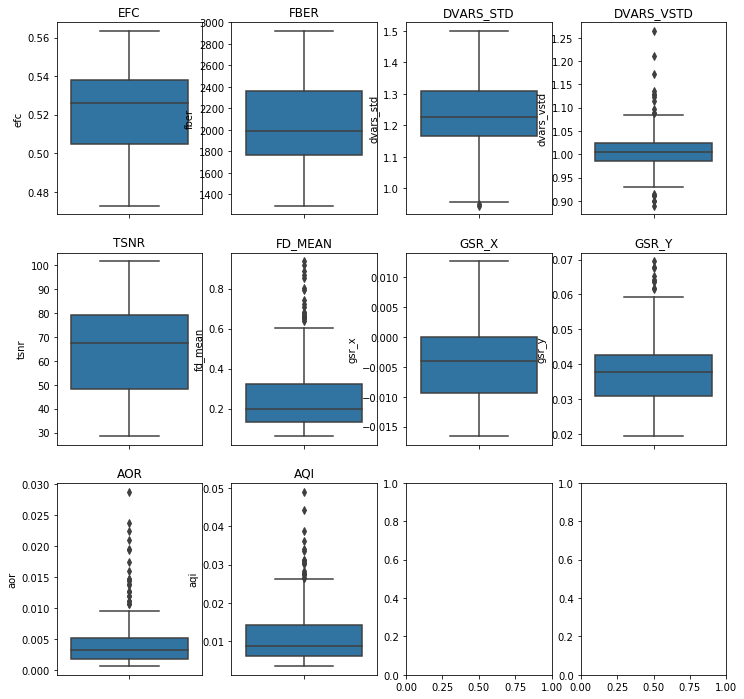

In [5]:
#Make some boxplots to get an idea of the variability skew etc of different IQM's

import matplotlib.pyplot as plt

fig,((ax1,ax2,ax3,ax4),
     (ax5,ax6,ax7,ax8),
     (ax9,ax10,ax11,ax12))=plt.subplots(nrows=3,ncols=4)
#If there's a better solution for plotting ~10 graphs together please comment 

fig.set_size_inches(12,12,forward=True)

sb.boxplot(y="efc", data=df,ax=ax1).set_title('EFC')
sb.boxplot(y="fber", data=df,ax=ax2).set_title('FBER')
sb.boxplot(y="dvars_std", data=df,ax=ax3).set_title('DVARS_STD')
sb.boxplot(y="dvars_vstd", data=df,ax=ax4).set_title('DVARS_VSTD')
sb.boxplot(y="tsnr", data=df,ax=ax5).set_title('TSNR')
sb.boxplot(y="fd_mean", data=df,ax=ax6).set_title('FD_MEAN')
sb.boxplot(y="gsr_x", data=df,ax=ax7).set_title('GSR_X')
sb.boxplot(y="gsr_y", data=df,ax=ax8).set_title('GSR_Y')
sb.boxplot(y="aor", data=df,ax=ax9).set_title('AOR')
sb.boxplot(y="aqi", data=df,ax=ax10).set_title('AQI')


IQR 

efc             0.030371
fber          565.710144
dvars_std       0.159785
dvars_vstd      0.054732
tsnr           28.175011
fd_mean         0.193874
gsr_x           0.008877
gsr_y           0.012252
aor             0.003333
aqi             0.008102
dtype: float64 

lower fence 

efc             0.462623
fber          908.542877
dvars_std       0.903100
dvars_vstd      0.900314
tsnr            5.297003
fd_mean        -0.161966
gsr_x          -0.020987
gsr_y           0.012506
aor            -0.003067
aqi            -0.005875
dtype: float64 

upper fence 

efc              0.584106
fber          3171.383453
dvars_std        1.542240
dvars_vstd       1.119240
tsnr           117.997046
fd_mean          0.613531
gsr_x            0.014522
gsr_y            0.061513
aor              0.010263
aqi              0.026532
dtype: float64
Total Number of Runs:  64
Number of Outlier Runs:  6
Percent of Outlier Runs : 9.375 %


/usr/local/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:51: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,Sub,run,task,fname,efc,fber,dvars_std,dvars_vstd,tsnr,fd_mean,gsr_x,gsr_y,aor,aqi,is_outlier
0,sub-135,01,ultimatum,sub-135_task-ultimatum_run-01_bold.json,0.538960,1631.284546,1.174655,1.043158,47.456081,0.446437,-0.010267,0.052662,0.004801,0.013162,False
4,sub-135,02,ultimatum,sub-135_task-ultimatum_run-02_bold.json,0.539327,1614.729980,1.138366,1.002833,53.455585,0.335381,-0.010858,0.053750,0.004697,0.011064,False
9,sub-118,01,ultimatum,sub-118_task-ultimatum_run-01_bold.json,0.518848,1907.781250,1.198587,1.080869,49.095085,0.324839,0.005687,0.032719,0.013860,0.013174,False
16,sub-118,02,ultimatum,sub-118_task-ultimatum_run-02_bold.json,0.519358,1902.786621,1.078264,0.995703,41.642033,0.401716,0.006050,0.033430,0.011856,0.021100,False
21,sub-107,02,ultimatum,sub-107_task-ultimatum_run-02_bold.json,0.549789,1794.837646,1.274077,0.981868,71.110962,0.102387,0.000043,0.032971,0.001572,0.005793,False


ultimatum
IQR 

efc             0.031958
fber          605.686829
dvars_std       0.153053
dvars_vstd      0.043196
tsnr           33.827329
fd_mean         0.177845
gsr_x           0.007871
gsr_y           0.011616
aor             0.003495
aqi             0.007425
dtype: float64 

lower fence 

efc             0.458438
fber          855.689850
dvars_std       0.933338
dvars_vstd      0.922273
tsnr           -5.090106
fd_mean        -0.128734
gsr_x          -0.019418
gsr_y           0.014074
aor            -0.003519
aqi            -0.004883
dtype: float64 

upper fence 

efc              0.586270
fber          3278.437164
dvars_std        1.545551
dvars_vstd       1.095057
tsnr           130.219209
fd_mean          0.582646
gsr_x            0.012067
gsr_y            0.060537
aor              0.010460
aqi              0.024817
dtype: float64
Total Number of Runs:  64
Number of Outlier Runs:  6
Percent of Outlier Runs : 9.375 %


,Sub,run,task,fname,efc,fber,dvars_std,dvars_vstd,tsnr,fd_mean,gsr_x,gsr_y,aor,aqi,is_outlier
1,sub-135,01,sharedreward,sub-135_task-sharedreward_run-01_bold.json,0.537734,1624.774780,1.009653,0.912825,37.541183,0.415181,-0.010523,0.051957,0.002383,0.022755,False
8,sub-135,02,sharedreward,sub-135_task-sharedreward_run-02_bold.json,0.537939,1648.710205,1.180812,1.004931,44.888691,0.399505,-0.011427,0.051437,0.003549,0.015325,False
10,sub-118,02,sharedreward,sub-118_task-sharedreward_run-02_bold.json,0.515447,1951.270508,1.107388,1.027044,37.410278,0.600551,0.006666,0.033588,0.014703,0.024407,True
17,sub-118,01,sharedreward,sub-118_task-sharedreward_run-01_bold.json,0.514571,1968.987549,1.268328,1.045204,67.165337,0.207724,0.006660,0.033183,0.004391,0.007712,False
18,sub-107,01,sharedreward,sub-107_task-sharedreward_run-01_bold.json,0.551347,1765.811401,1.349020,1.009644,79.478279,0.093593,-0.000737,0.033131,0.001808,0.004342,False


sharedreward
IQR 

efc             0.034453
fber          605.662415
dvars_std       0.138699
dvars_vstd      0.037723
tsnr           29.960480
fd_mean         0.193885
gsr_x           0.008998
gsr_y           0.011777
aor             0.003232
aqi             0.008001
dtype: float64 

lower fence 

efc             0.451438
fber          856.848969
dvars_std       0.961029
dvars_vstd      0.928021
tsnr            5.494276
fd_mean        -0.158608
gsr_x          -0.023284
gsr_y           0.012970
aor            -0.003236
aqi            -0.006328
dtype: float64 

upper fence 

efc              0.589248
fber          3279.498627
dvars_std        1.515825
dvars_vstd       1.078912
tsnr           125.336195
fd_mean          0.616931
gsr_x            0.012706
gsr_y            0.060080
aor              0.009693
aqi              0.025677
dtype: float64
Total Number of Runs:  150
Number of Outlier Runs:  12
Percent of Outlier Runs : 8.0 %


,Sub,run,task,fname,efc,fber,dvars_std,dvars_vstd,tsnr,fd_mean,gsr_x,gsr_y,aor,aqi,is_outlier
2,sub-135,03,trust,sub-135_task-trust_run-03_bold.json,0.537564,1637.445801,1.179573,1.029765,54.172623,0.365229,-0.012143,0.051675,0.005036,0.010636,False
3,sub-135,04,trust,sub-135_task-trust_run-04_bold.json,0.537741,1618.478271,1.161524,1.013268,58.534828,0.368954,-0.010977,0.052960,0.004003,0.009191,False
5,sub-135,01,trust,sub-135_task-trust_run-01_bold.json,0.535721,1655.330200,1.160553,1.014396,64.016190,0.272260,-0.011680,0.050679,0.003750,0.008279,False
6,sub-135,05,trust,sub-135_task-trust_run-05_bold.json,0.537996,1620.977905,1.112167,0.982916,50.171574,0.316585,-0.011026,0.053022,0.003302,0.012740,False
7,sub-135,02,trust,sub-135_task-trust_run-02_bold.json,0.536265,1642.447998,1.186630,1.024818,63.933895,0.319849,-0.011578,0.051646,0.002943,0.007789,False


trust


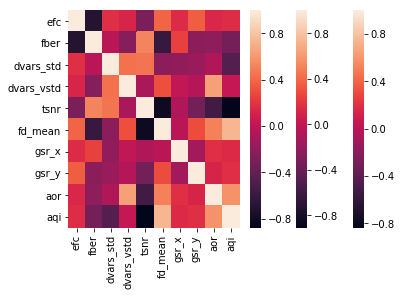

In [6]:
from __future__ import division # so we divide like we expect otherwise we'll get 0's

for dfcur in [df.loc[df['task']==val,:] for val in df['task'].unique()]:
    #Making the outlier fences
    #find the 1 and 3rd quartile
    Q1=dfcur.quantile(0.25)
    Q3=dfcur.quantile(0.75)
    #find the interquartile range
    IQR = Q3 - Q1
    #defining fences as 1.5*IQR further than the 1st and 3rd quartile from the mean
    lower=Q1 - 1.5 * IQR
    upper=Q3 + 1.5 * IQR


    print '\033[1m' +'IQR''\033[0m',os.linesep,os.linesep, IQR, os.linesep
    print '\033[1m' +'lower fence''\033[0m',os.linesep,os.linesep,Q1 - 1.5 * IQR,os.linesep
    print '\033[1m' +'upper fence''\033[0m',os.linesep,os.linesep,Q3 + 1.5 * IQR
    # Outlier detection
    #maybe a nicer way to do this with logicals but it's easier to see what's going on here
    #Make sure you get the 'right outliers' we don't care if some one is exceptionally still
    out_efc=dfcur.efc>upper.efc
    out_fber=dfcur.fber<lower.fber
    out_tsnr=dfcur.tsnr<lower.tsnr
    out_fd_mean=dfcur.fd_mean>upper.fd_mean
    out_gsr_y=dfcur.gsr_y>upper.gsr_y
    #now we have a list of Bools
    out_efc=np.array(out_efc.astype(int))
    out_fber=np.array(out_fber.astype(int))
    out_tsnr=np.array(out_tsnr.astype(int))
    out_fd_mean=np.array(out_fd_mean.astype(int))
    out_gsr_y=np.array(out_gsr_y.astype(int))
    #now those Bools are 0's or 1's

    # Get an idea of how correlated the different measures are in our dataset
    #Actually a little surprising that there isn't more correlation in general here
    corr = dfcur.corr()
    sb.heatmap(corr, 
                xticklabels=corr.columns.values,
                yticklabels=corr.columns.values)
    #all become 1 outlier Bool
    # add across 0's and 1's to count the number of outlier vairables per run
    outlier_=out_efc+out_fber+out_tsnr+out_fd_mean+out_gsr_y
    #if a run is an outlier on 1 metric we want to note it
    outlier_=outlier_>0


    print "Total Number of Runs: ", len(outlier_)
    print "Number of Outlier Runs: ",np.sum(outlier_)
    print "Percent of Outlier Runs :",np.sum(outlier_)/len(outlier_)*100,"%" 
    #Add an outlier column to the dataframe
    dfcur["is_outlier"]=outlier_
    display(dfcur.head())
    print dfcur['task'].iloc[0]
    dfcur.to_csv(cwd+'/task-%s_outlier_exclusion_data.csv'%(dfcur['task'].iloc[0]),index=False)

#Gonna Use the Outlier info in our dataframe to make either 3 or 4 run
# .fsf L2 files
# for everyone in the right list we'll copy the corresponding(3/4) template

df_3runs=df.loc[(df['outlier']==False) & (df['Sub'].isin(nRUN3_subs))]
df_4runs=df.loc[(df['outlier']==False) & (df['Sub'].isin(nRUN4_subs))]

# Here's a nice big loop that does the majority of work we're caring about
# This could be massively improved by looking for the done file and by using multicore
import shutil
# This loop will just be for the subjects with 3 good runs
# We're getting rid of 007 for now because his L1 didn't populate/was deleted
for sub in nRUN3_subs[0:4]:
    #FSL will not write over the files we'd want it to so if an L2 directory exists we're gonna get rid of it
    # Later we will right this to check if the entire analysis is done before deciding to delete
    if os.path.exists(cwd+'/Analysis/Model_3/L2/'+sub):
        shutil.rmtree(cwd+'/Analysis/Model_3/L2/'+sub)
    os.makedirs(cwd+'/Analysis/Model_3/L2/'+sub)
    #Here we defin the variables that we're going to change in the design file
    # That mostly consists of putting the right subject number in the right place
    # The runs are a little trickier for the 3 run participants though because they could have any combination
    # runs:{1,2,3},{1,2,4},{1,3,4},{2,3,4}
    OUTPUT=cwd+'/Analysis/Model_3/L2/'+sub+'/L2_task-MGT_model-03'
    ITEMPLATE=cwd+'/templates/L2_3runs.fsf'
    OTEMPLATE=cwd+'/Analysis/Model_3/L2/'+sub+'/L2_task-MGT_model-03.fsf'
    #this is how I decided to deal with the runs issue
    runs=np.array(df_3runs[df_3runs.Sub==sub].run)
    INPUT1=cwd+'/Analysis/Model_3/L1/'+sub+'/L1_task-MGT_model-03_run-'+runs[0]+'.feat'
    INPUT2=cwd+'/Analysis/Model_3/L1/'+sub+'/L1_task-MGT_model-03_run-'+runs[1]+'.feat'
    INPUT3=cwd+'/Analysis/Model_3/L1/'+sub+'/L1_task-MGT_model-03_run-'+runs[2]+'.feat'
    #This prints stuff to help me see what I've done wrong if something breaks
    #we check if everything I name exists, we expect everything except the OTEMPLATE is there already
    print os.path.isfile(OTEMPLATE)
    print os.path.isfile(ITEMPLATE)
    print os.path.isdir(INPUT1)
    print os.path.isdir(INPUT2)
    print os.path.isdir(INPUT3)
    print
    # the ! turns the line into a 'magic shell' letting it run bash for the line it's not necessary here but is later
    !echo $sub 
    !echo $OUTPUT
    !echo $ITEMPLATE
    !echo $OTEMPLATE
    !echo $INPUT1
    !echo $INPUT2
    !echo $INPUT3
    print
    
    #This comment is the current work for replacing stuff earlier
    #if os.path.isfile(OUTPUT+'/cope3.feat/cluster_mask_zstat1.nii.gz'):
        #print "skipping existing output"
    #else:
        #! rm -rf ${OUTPUT}.gfeat
    
    #printing out the command to change the template it takes in the text file named ITMEPLATE looks for
    #strings OUTPUT,INPUT1,INPUT2,INPUT3 and replaces them with the corresponding variables we set earlier
    #then saves it to the OTEMPLATE file
    print(
        "sed -e 's@OUTPUT@'%s'@g' -e 's@INPUT1@'%s'@g' -e 's@INPUT2@'%s'@g' -e 's@INPUT3@'%s'@g' %s %s"
    %(OUTPUT,INPUT1,INPUT2,INPUT3,ITEMPLATE,OTEMPLATE))
    print
    #subprocess might be a nicer way of using the 'magic command'I'm not sure but it's on ice in the comments now
    #subprocess.call([
        #"sed -e 's@OUTPUT@'%s'@g' -e 's@INPUT1@'%s'@g' -e 's@INPUT2@'%s'@g' -e 's@INPUT3@'%s'@g' <%s> %s"
   # %(OUTPUT,INPUT1,INPUT2,INPUT3,ITEMPLATE,OTEMPLATE)]
       # , shell=True)
    !sed -e 's@OUTPUT@'$OUTPUT'@g' -e 's@INPUT1@'$INPUT1'@g' -e 's@INPUT2@'$INPUT2'@g' -e 's@INPUT3@'$INPUT3'@g' <$ITEMPLATE> $OTEMPLATE
    #then we print out the feat command and run feat with the OTEMPLATE we just made
    print "feat %s" %(OTEMPLATE)
    !feat $OTEMPLATE

for sub in nRUN4_subs:
    if os.path.exists(cwd+'/Analysis/Model_3/L2/'+sub):
        shutil.rmtree(cwd+'/Analysis/Model_3/L2/'+sub)
    os.makedirs(cwd+'/Analysis/Model_3/L2/'+sub)
    #Here we defin the variables that we're going to change in the design file
    # That mostly consists of putting the right subject number in the right place
    # The runs are a little trickier for the 3 run participants though because they could have any combination
    # runs:{1,2,3},{1,2,4},{1,3,4},{2,3,4}
    OUTPUT=cwd+'/Analysis/Model_3/L2/'+sub+'/L2_task-MGT_model-03'
    ITEMPLATE=cwd+'/templates/L2_4runs.fsf'
    OTEMPLATE=cwd+'/Analysis/Model_3/L2/'+sub+'/L2_task-MGT_model-03.fsf'
    
    runs=np.array(df_4runs[df_4runs.Sub==sub].run)
    INPUT1=cwd+'/Analysis/Model_3/L1/'+sub+'/L1_task-MGT_model-03_run-'+runs[0]+'.feat'
    INPUT2=cwd+'/Analysis/Model_3/L1/'+sub+'/L1_task-MGT_model-03_run-'+runs[1]+'.feat'
    INPUT3=cwd+'/Analysis/Model_3/L1/'+sub+'/L1_task-MGT_model-03_run-'+runs[2]+'.feat'
    INPUT4=cwd+'/Analysis/Model_3/L1/'+sub+'/L1_task-MGT_model-03_run-'+runs[3]+'.feat'

    print os.path.isfile(OTEMPLATE)
    print os.path.isfile(ITEMPLATE)
    print os.path.isdir(INPUT1)
    print os.path.isdir(INPUT2)
    print os.path.isdir(INPUT3)
    print
    !echo $sub 
    !echo $OUTPUT
    !echo $ITEMPLATE
    !echo $OTEMPLATE
    !echo $INPUT1
    !echo $INPUT2
    !echo $INPUT3
    !echo $INPUT4
    print
    if os.path.isfile(OUTPUT+'/cope3.feat/cluster_mask_zstat1.nii.gz'):
        print "skipping existing output"
    else:
        ! rm -rf ${OUTPUT}.gfeat
    print(
        "sed -e 's@OUTPUT@'%s'@g' -e 's@INPUT1@'%s'@g' -e 's@INPUT2@'%s'@g' -e 's@INPUT3@'%s'@g' %s %s"
    %(OUTPUT,INPUT1,INPUT2,INPUT3,ITEMPLATE,OTEMPLATE))
    print
    #subprocess.call([
        #"sed -e 's@OUTPUT@'%s'@g' -e 's@INPUT1@'%s'@g' -e 's@INPUT2@'%s'@g' -e 's@INPUT3@'%s'@g' <%s> %s"
   # %(OUTPUT,INPUT1,INPUT2,INPUT3,ITEMPLATE,OTEMPLATE)]
       # , shell=True)
    !sed -e 's@OUTPUT@'$OUTPUT'@g' -e 's@INPUT1@'$INPUT1'@g' -e 's@INPUT2@'$INPUT2'@g' -e 's@INPUT3@'$INPUT3'@g' -e 's@INPUT4@'$INPUT4'@g' <$ITEMPLATE> $OTEMPLATE
    print "feat %s" %(OTEMPLATE)
    print(
        "sed -e 's@OUTPUT@'%s'@g' -e 's@INPUT1@'%s'@g' -e 's@INPUT2@'%s'@g' -e 's@INPUT3@'%s'@g' %s %s"
    %(OUTPUT,INPUT1,INPUT2,INPUT3,ITEMPLATE,OTEMPLATE))
    !feat $OTEMPLATE